In [7]:
import os
print(os.getcwd())

C:\Users\prata\ccdfl


In [28]:
pip install openpyxl

SyntaxError: invalid syntax (1851461830.py, line 1)

In [25]:
import pandas as pd
file_path = 'C:/Users/prata/ccdfl/data_merged.xlsx'
df = pd.read_excel(file_path, sheet_name=None)
df = pd.concat(df.values(), ignore_index=True)

In [26]:
# Convert 'TX_DATETIME' to numerical format (e.g., seconds since epoch)
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['TX_DATETIME'] = df['TX_DATETIME'].astype('int64') // 10**9  # Convert to seconds since epoch

# Ensure 'TX_TIME_SECONDS' and 'TX_TIME_DAYS' are integers
df['TX_TIME_SECONDS'] = df['TX_TIME_SECONDS'].astype('int32')
df['TX_TIME_DAYS'] = df['TX_TIME_DAYS'].astype('int32')

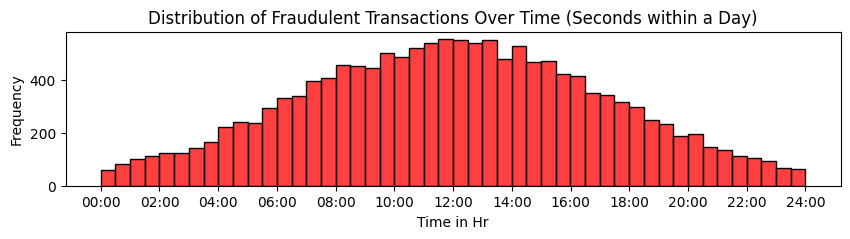

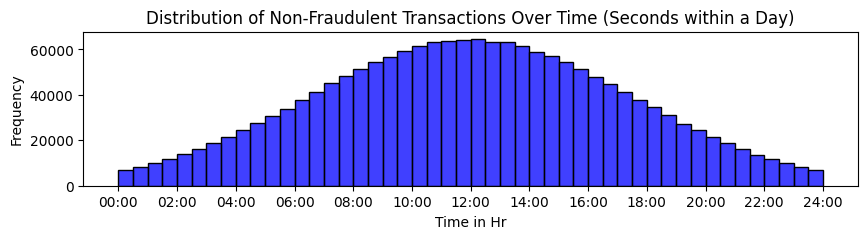

In [24]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Adjust TX_TIME_SECONDS to wrap around 24 hours (86400 seconds in a day)
# df['TX_TIME_DAY_SECONDS'] = df['TX_TIME_SECONDS'] % 86400

# # Filter data for fraud and non-fraud
# fraud_df = df[df['TX_FRAUD'] == 1]
# non_fraud_df = df[df['TX_FRAUD'] == 0]

# # Plot for fraudulent transactions over time (seconds within a day)
# plt.figure(figsize=(10, 2))
# sns.histplot(fraud_df['TX_TIME_DAY_SECONDS'], bins=48, color='red')  # Using 48 bins for 30-minute intervals
# plt.title('Distribution of Fraudulent Transactions Over Time (Seconds within a Day)')
# plt.xlabel('Time in Hr')
# plt.ylabel('Frequency')
# plt.xticks(ticks=range(0, 86401, 7200), labels=[f'{i//3600:02d}:{(i%3600)//60:02d}' for i in range(0, 86401, 7200)])  # Show labels as HH:MM
# # plt.grid(True)  # Optional: adds a grid for better readability
# plt.show()

# # Plot for non-fraudulent transactions over time (seconds within a day)
# plt.figure(figsize=(10, 2))
# sns.histplot(non_fraud_df['TX_TIME_DAY_SECONDS'], bins=48, color='blue')  # Using 48 bins for 30-minute intervals
# plt.title('Distribution of Non-Fraudulent Transactions Over Time (Seconds within a Day)')
# plt.xlabel('Time in Hr')
# plt.ylabel('Frequency')
# plt.xticks(ticks=range(0, 86401, 7200), labels=[f'{i//3600:02d}:{(i%3600)//60:02d}' for i in range(0, 86401, 7200)])  # Show labels as HH:MM
# # plt.grid(True)  # Optional
# plt.show()

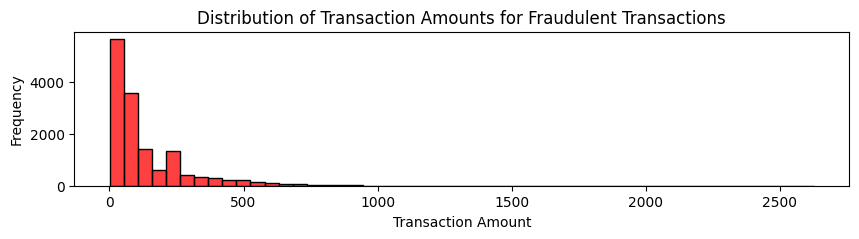

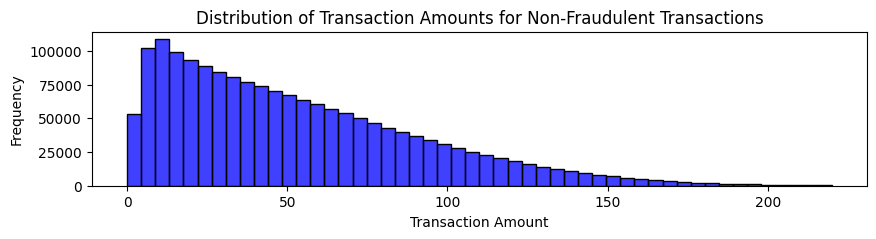

In [20]:
# # Plot for fraudulent transactions amounts
# plt.figure(figsize=(10, 2))
# sns.histplot(fraud_df['TX_AMOUNT'], bins=50, color='red')
# plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
# plt.xlabel('Transaction Amount')
# plt.ylabel('Frequency')
# plt.show()

# # Plot for non-fraudulent transactions amounts
# plt.figure(figsize=(10, 2))
# sns.histplot(non_fraud_df['TX_AMOUNT'], bins=50, color='blue')
# plt.title('Distribution of Transaction Amounts for Non-Fraudulent Transactions')
# plt.xlabel('Transaction Amount')
# plt.ylabel('Frequency')
# plt.show()

In [29]:
pip install imblearn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.0 kB 487.6 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 901.1 kB/s eta 0:00:01
   ---------------------------------- ----- 225.3/258.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.3 MB/s eta 0:00:00


In [30]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TRANSACTION_ID'], axis=1)
y = df['TX_FRAUD']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the number of rows after applying SMOTE
print(f"Number of rows with TX_FRAUD = 0 after SMOTE: {sum(y_resampled == 0)}")
print(f"Number of rows with TX_FRAUD = 1 after SMOTE: {sum(y_resampled == 1)}")

Number of rows with TX_FRAUD = 0 after SMOTE: 1739474
Number of rows with TX_FRAUD = 1 after SMOTE: 1739474


In [32]:
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

# Combine X and y into a single dataframe
df = pd.concat([X_resampled, y_resampled], axis=1)

# Print the first few rows of df to verify
print(df.tail())


# Count the number of rows where TX_FRAUD is 0 or 1
fraud_counts = df['TX_FRAUD'].value_counts()

# Print the counts
print(f"Number of rows with TX_FRAUD = 0: {fraud_counts.get(0, 0)}")
print(f"Number of rows with TX_FRAUD = 1: {fraud_counts.get(1, 0)}")

         TX_DATETIME  CUSTOMER_ID  TERMINAL_ID   TX_AMOUNT  TX_TIME_SECONDS  \
3478943   1525210530         1573         5168   39.396296          2669730   
3478944   1534502297         1898          883  197.037316         11961497   
3478945   1523369066         4411         5177   24.633753           828266   
3478946   1525007236         1182         6548  361.344759          2466436   
3478947   1531669640         1937         4123   84.714086          9128840   

         TX_TIME_DAYS  TX_FRAUD  
3478943            30         1  
3478944           138         1  
3478945             9         1  
3478946            28         1  
3478947           105         1  
Number of rows with TX_FRAUD = 0: 1739474
Number of rows with TX_FRAUD = 1: 1739474


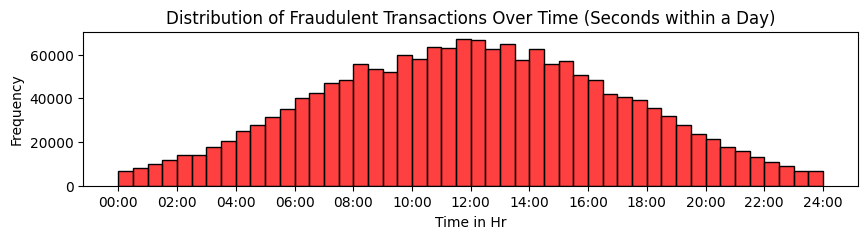

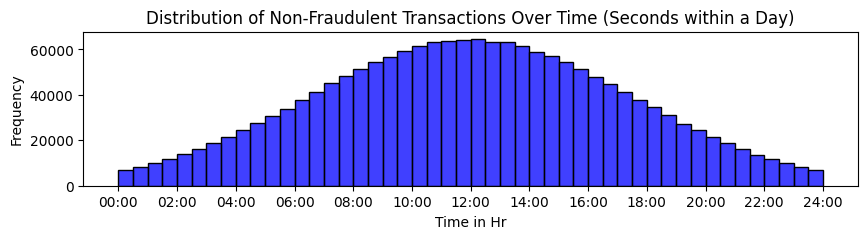

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust TX_TIME_SECONDS to wrap around 24 hours (86400 seconds in a day)
df['TX_TIME_DAY_SECONDS'] = df['TX_TIME_SECONDS'] % 86400

# Filter data for fraud and non-fraud
fraud_df = df[df['TX_FRAUD'] == 1]
non_fraud_df = df[df['TX_FRAUD'] == 0]

# Plot for fraudulent transactions over time (seconds within a day)
plt.figure(figsize=(10, 2))
sns.histplot(fraud_df['TX_TIME_DAY_SECONDS'], bins=48, color='red')  # Using 48 bins for 30-minute intervals
plt.title('Distribution of Fraudulent Transactions Over Time (Seconds within a Day)')
plt.xlabel('Time in Hr')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, 86401, 7200), labels=[f'{i//3600:02d}:{(i%3600)//60:02d}' for i in range(0, 86401, 7200)])  # Show labels as HH:MM
# plt.grid(True)  # Optional: adds a grid for better readability
plt.show()

# Plot for non-fraudulent transactions over time (seconds within a day)
plt.figure(figsize=(10, 2))
sns.histplot(non_fraud_df['TX_TIME_DAY_SECONDS'], bins=48, color='blue')  # Using 48 bins for 30-minute intervals
plt.title('Distribution of Non-Fraudulent Transactions Over Time (Seconds within a Day)')
plt.xlabel('Time in Hr')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, 86401, 7200), labels=[f'{i//3600:02d}:{(i%3600)//60:02d}' for i in range(0, 86401, 7200)])  # Show labels as HH:MM
# plt.grid(True)  # Optional
plt.show()

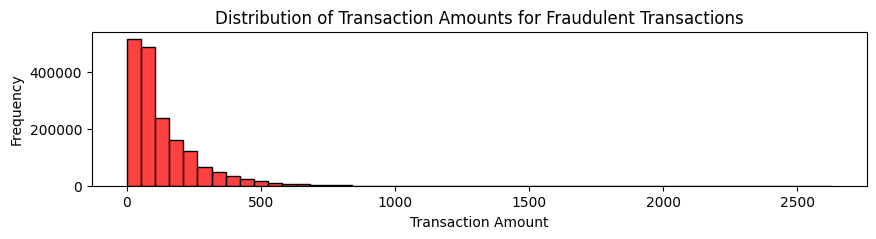

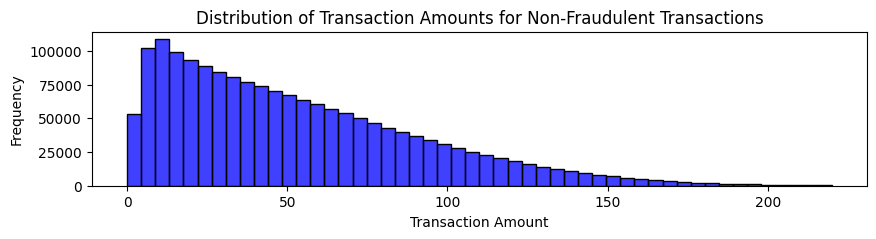

In [34]:
# Plot for fraudulent transactions amounts
plt.figure(figsize=(10, 2))
sns.histplot(fraud_df['TX_AMOUNT'], bins=50, color='red')
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot for non-fraudulent transactions amounts
plt.figure(figsize=(10, 2))
sns.histplot(non_fraud_df['TX_AMOUNT'], bins=50, color='blue')
plt.title('Distribution of Transaction Amounts for Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [6]:
import numpy as np

In [7]:
df['BANK_ID'] = np.random.choice(np.arange(1, 101), size=len(df))

In [8]:
print(df.tail())

         TX_DATETIME  CUSTOMER_ID  TERMINAL_ID   TX_AMOUNT  TX_TIME_SECONDS  \
3478943   1525210530         1573         5168   39.396296          2669730   
3478944   1534502297         1898          883  197.037316         11961497   
3478945   1523369066         4411         5177   24.633753           828266   
3478946   1525007236         1182         6548  361.344759          2466436   
3478947   1531669640         1937         4123   84.714086          9128840   

         TX_TIME_DAYS  TX_FRAUD  BANK_ID  
3478943            30         1        4  
3478944           138         1       51  
3478945             9         1       39  
3478946            28         1        3  
3478947           105         1       95  


In [9]:
edge_ids = {}

# Iterate over each unique BANK_ID
for bank_id in range(1, 101):
    # Generate a single random edge ID from 1 to 5
    edge_ids[bank_id] = np.random.randint(1, 6)

print(edge_ids)

{1: 5, 2: 4, 3: 1, 4: 2, 5: 1, 6: 2, 7: 1, 8: 5, 9: 2, 10: 5, 11: 4, 12: 1, 13: 1, 14: 1, 15: 5, 16: 1, 17: 3, 18: 4, 19: 1, 20: 4, 21: 1, 22: 4, 23: 5, 24: 2, 25: 2, 26: 4, 27: 4, 28: 4, 29: 1, 30: 2, 31: 3, 32: 3, 33: 3, 34: 2, 35: 5, 36: 5, 37: 1, 38: 3, 39: 3, 40: 4, 41: 2, 42: 4, 43: 2, 44: 1, 45: 5, 46: 1, 47: 3, 48: 4, 49: 2, 50: 4, 51: 2, 52: 3, 53: 4, 54: 1, 55: 2, 56: 4, 57: 1, 58: 2, 59: 5, 60: 2, 61: 5, 62: 5, 63: 2, 64: 3, 65: 4, 66: 5, 67: 3, 68: 5, 69: 3, 70: 2, 71: 3, 72: 5, 73: 5, 74: 5, 75: 5, 76: 5, 77: 2, 78: 2, 79: 3, 80: 3, 81: 3, 82: 2, 83: 2, 84: 3, 85: 2, 86: 4, 87: 4, 88: 2, 89: 4, 90: 5, 91: 5, 92: 2, 93: 1, 94: 2, 95: 4, 96: 5, 97: 5, 98: 4, 99: 4, 100: 2}


In [10]:
from collections import defaultdict

value_map = defaultdict(list)

# Iterate over the items in the dictionary
for key, value in edge_ids.items():
    # Append the key to the list associated with the current value
    value_map[value].append(key)

# Print the value map
for value, keys in value_map.items():
    print(f"Keys associated with value {value}: {keys}")

Keys associated with value 5: [1, 8, 10, 15, 23, 35, 36, 45, 59, 61, 62, 66, 68, 72, 73, 74, 75, 76, 90, 91, 96, 97]
Keys associated with value 4: [2, 11, 18, 20, 22, 26, 27, 28, 40, 42, 48, 50, 53, 56, 65, 86, 87, 89, 95, 98, 99]
Keys associated with value 1: [3, 5, 7, 12, 13, 14, 16, 19, 21, 29, 37, 44, 46, 54, 57, 93]
Keys associated with value 2: [4, 6, 9, 24, 25, 30, 34, 41, 43, 49, 51, 55, 58, 60, 63, 70, 77, 78, 82, 83, 85, 88, 92, 94, 100]
Keys associated with value 3: [17, 31, 32, 33, 38, 39, 47, 52, 64, 67, 69, 71, 79, 80, 81, 84]


In [11]:
bank_weight = np.arange(1, 101)

# Shuffle the bank weights randomly
np.random.shuffle(bank_weight)

# Insert 0 at the beginning
bank_weight = np.insert(bank_weight, 0, 0)

# Display the rearranged bank_weight array
# print(bank_weight)

In [12]:
sorted_df = df.sort_values(by=['TX_TIME_DAYS', 'TX_TIME_SECONDS'])

# Display the sorted DataFrame
print(sorted_df.head())

         TX_DATETIME  CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  \
1648715   1522540831          596         3156      57.16               31   
1648716   1522540930         4961         3412      81.51              130   
1648717   1522541276            2         1365     146.00              476   
1648718   1522541369         4128         8737      64.49              569   
1648719   1522541434          927         9906      50.99              634   

         TX_TIME_DAYS  TX_FRAUD  BANK_ID  
1648715             0         0       70  
1648716             0         0       36  
1648717             0         0       73  
1648718             0         0       17  
1648719             0         0       55  


In [13]:
df=sorted_df
print(df.head())

         TX_DATETIME  CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  \
1648715   1522540831          596         3156      57.16               31   
1648716   1522540930         4961         3412      81.51              130   
1648717   1522541276            2         1365     146.00              476   
1648718   1522541369         4128         8737      64.49              569   
1648719   1522541434          927         9906      50.99              634   

         TX_TIME_DAYS  TX_FRAUD  BANK_ID  
1648715             0         0       70  
1648716             0         0       36  
1648717             0         0       73  
1648718             0         0       17  
1648719             0         0       55  


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

split_index = int(0.8 * len(df))

# Split the DataFrame into train and test sets
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Display the lengths of train and test sets
print("Train set length:", len(train_df))
print("Test set length:", len(test_df))


Train set length: 2783158
Test set length: 695790


In [15]:
total_length = len(train_df)

# Calculate the index to split at (80% of the length)
split_index = int(total_length * 0.8)

# Split the train_df into two equal parts
train_part1 = train_df.iloc[:split_index]
train_part2 = train_df.iloc[split_index:]

# Display the lengths of the two parts
print("Length of train_part1:", len(train_part1))
print("Length of train_part2:", len(train_part2))

Length of train_part1: 2226526
Length of train_part2: 556632


In [180]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming the target column is named 'target', adjust as necessary
X_train = train_part1.drop(columns=['TX_FRAUD'])
y_train = train_part1['TX_FRAUD']

# X_test = test_df.drop(columns=['TX_FRAUD'])
# y_test = test_df['TX_FRAUD']

# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42, tol=0.0001)

# Train the model
mlp.fit(X_train, y_train)


Iteration 1, loss = 17.91921748


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1, random_state=42,
              verbose=10)

In [233]:
global_weights = mlp.coefs_.copy()
global_biases = mlp.intercepts_.copy()
# print(global_weights)
# print(global_biases)

In [234]:
print((global_biases))

[array([-0.08940649, -0.28080925,  0.13595327, -0.02264303, -0.04405747,
        0.23617645, -0.22605052, -0.01502513, -0.32896962, -0.05448872,
       -0.25796612, -0.24220655, -0.26341718,  0.08674903,  0.12594209,
        0.0377959 ,  0.24650901, -0.08892558, -0.1245874 ,  0.18755753,
       -0.18580336,  0.25765468, -0.28363432,  0.25236951, -0.28099215,
        0.06149376,  0.01610526,  0.2783105 , -0.30152491,  0.00041008,
        0.23050787,  0.01342579,  0.07523257,  0.06751329, -0.04236838,
       -0.10515682,  0.04670173,  0.20403252, -0.34153931, -0.12734842,
        0.26186119,  0.22019133, -0.02578125,  0.01964728, -0.129431  ,
       -0.19413003, -0.02110582, -0.0973768 ,  0.02076798, -0.25387852,
        0.25766985,  0.26216921,  0.07907626, -0.08380693, -0.11591356,
        0.16838349,  0.10740283, -0.22243487,  0.21861425,  0.16179915,
        0.23865265,  0.1027339 ,  0.00701378, -0.07650815]), array([ 0.13999951,  0.01725745, -0.23136054, -0.23711084, -0.04856336,
  

In [235]:
local_weights=[]
local_biases=[]
local_edge_weight=[]
for _ in range(6):
    local_weights.append(global_weights)
for _ in range(6):
    local_biases.append(global_biases)
for _ in range(6):
    local_edge_weight.append(0)

In [236]:
bank_weights=[]
bank_biases=[]
bank_edge_weight=[]
for i in range(101):
    bank_weights.append(global_weights)
for _ in range(101):
    bank_biases.append(global_biases)
for _ in range(101):
    bank_edge_weight.append(0)

In [237]:
def get_local_weights():
    return local_weights
def get_local_biases():
    return local_biases
def get_local_edge_weight():
    return local_edge_weight

In [238]:
def extract_global_weights():
  return global_weights
def extract_global_biases():
  return global_biases

In [239]:
print((global_biases))

[array([-0.08940649, -0.28080925,  0.13595327, -0.02264303, -0.04405747,
        0.23617645, -0.22605052, -0.01502513, -0.32896962, -0.05448872,
       -0.25796612, -0.24220655, -0.26341718,  0.08674903,  0.12594209,
        0.0377959 ,  0.24650901, -0.08892558, -0.1245874 ,  0.18755753,
       -0.18580336,  0.25765468, -0.28363432,  0.25236951, -0.28099215,
        0.06149376,  0.01610526,  0.2783105 , -0.30152491,  0.00041008,
        0.23050787,  0.01342579,  0.07523257,  0.06751329, -0.04236838,
       -0.10515682,  0.04670173,  0.20403252, -0.34153931, -0.12734842,
        0.26186119,  0.22019133, -0.02578125,  0.01964728, -0.129431  ,
       -0.19413003, -0.02110582, -0.0973768 ,  0.02076798, -0.25387852,
        0.25766985,  0.26216921,  0.07907626, -0.08380693, -0.11591356,
        0.16838349,  0.10740283, -0.22243487,  0.21861425,  0.16179915,
        0.23865265,  0.1027339 ,  0.00701378, -0.07650815]), array([ 0.13999951,  0.01725745, -0.23136054, -0.23711084, -0.04856336,
  

In [240]:
def distribute_global_weights_biases():
  for i in range(1,6):
    local_weights[i]=global_weights.copy()
    local_biases[i]=global_biases.copy()
    local_edge_weight[i]=1
distribute_global_weights_biases()

In [241]:
def distribute_local_weights_biases():
  for i in range(1,6):
    for bank in value_map[i]:
      bank_weights[bank]=local_weights[i].copy()
      bank_biases[bank]=local_biases[i].copy()
      bank_edge_weight[bank]=1
distribute_local_weights_biases()

In [242]:
# print((local_biases))

In [243]:
def update_global_weights_biases():
  # weighted_local_weights = [local_weight * weight for local_weight, weight in zip(get_local_weights(), get_local_edge_weight())]
  # weighted_local_biases = [local_bias * weight for local_bias, weight in zip(get_local_biases(), get_local_edge_weight())]
  # global_weights = weighted_local_weights
  # global_biases = weighted_local_biases
  global_weights_temp=[0]*3
  global_biases_temp=[0]*3
  for idx in range(3):
    global_weights_temp[idx] = np.zeros_like(global_weights[idx])
    global_biases_temp[idx] = np.zeros_like(global_biases[idx])
  tot_weight=0
  # print(global_biases)
  # print(global_biases_temp)

  for i in range(1,6):
    for idx in range(3):
      global_weights_temp[idx]+=local_weights[i][idx]*local_edge_weight[i]
      global_biases_temp[idx]+=local_biases[i][idx]*local_edge_weight[i]
    tot_weight+=local_edge_weight[i]
  # print(global_biases_temp)
  for idx in range(3):
    global_weights_temp[idx]=global_weights_temp[idx]/tot_weight
    global_biases_temp[idx]=global_biases_temp[idx]/tot_weight
  # print(global_biases_temp)
  for idx in range(3):
    global_weights[idx]=global_weights_temp[idx].copy()
    global_biases[idx]=global_biases_temp[idx].copy()
  # print(global_biases)


In [244]:
update_global_weights_biases()

In [245]:
print((global_biases))

[array([-0.08940649, -0.28080925,  0.13595327, -0.02264303, -0.04405747,
        0.23617645, -0.22605052, -0.01502513, -0.32896962, -0.05448872,
       -0.25796612, -0.24220655, -0.26341718,  0.08674903,  0.12594209,
        0.0377959 ,  0.24650901, -0.08892558, -0.1245874 ,  0.18755753,
       -0.18580336,  0.25765468, -0.28363432,  0.25236951, -0.28099215,
        0.06149376,  0.01610526,  0.2783105 , -0.30152491,  0.00041008,
        0.23050787,  0.01342579,  0.07523257,  0.06751329, -0.04236838,
       -0.10515682,  0.04670173,  0.20403252, -0.34153931, -0.12734842,
        0.26186119,  0.22019133, -0.02578125,  0.01964728, -0.129431  ,
       -0.19413003, -0.02110582, -0.0973768 ,  0.02076798, -0.25387852,
        0.25766985,  0.26216921,  0.07907626, -0.08380693, -0.11591356,
        0.16838349,  0.10740283, -0.22243487,  0.21861425,  0.16179915,
        0.23865265,  0.1027339 ,  0.00701378, -0.07650815]), array([ 0.13999951,  0.01725745, -0.23136054, -0.23711084, -0.04856336,
  

In [246]:
def update_local_weights_biases():
  # print(local_biases)
  for i in range(1,6):
    # print("bank")
    # print(i)
    bank_weights_temp=[0]*3
    bank_biases_temp=[0]*3
    for idx in range(3):
      bank_weights_temp[idx]=np.zeros_like(global_weights[idx])
      bank_biases_temp[idx]=np.zeros_like(global_biases[idx])

    total_weight=0
    for bank in value_map[i]:
      for idx in range(3):
        bank_weights_temp[idx]+=bank_weights[bank][idx]*bank_edge_weight[bank]
        bank_biases_temp[idx]+=bank_biases[bank][idx]*bank_edge_weight[bank]
      total_weight+=bank_edge_weight[bank]
    for idx in range(3):
      bank_weights_temp[idx]=bank_weights_temp[idx]/total_weight
      bank_biases_temp[idx]=bank_biases_temp[idx]/total_weight
    for idx in range(3):
      local_weights[i][idx] = bank_weights_temp[idx]
      local_biases[i][idx] = bank_biases_temp[idx]
    local_edge_weight[i]=total_weight
    # print(local_biases)
  # print(local_biases)


In [247]:
update_local_weights_biases()

In [248]:
# print(global_weights)
# print(global_biases)

In [249]:
# Dictionary to store DataFrames for each unique TX_TIME_DAYS
dfs_by_day = {}
# count=0
# Iterate over unique TX_TIME_DAYS values
for day in train_part2['TX_TIME_DAYS'].unique():
    # Filter DataFrame for the current day
    df_day = train_part2[train_part2['TX_TIME_DAYS'] == day].copy()
    # Store DataFrame in the dictionary
    dfs_by_day[day] = df_day
    # count+=len(df_day)
# print(count)

In [250]:
import tensorflow as tf


In [251]:
print(bank_biases)

[[array([-0.08940649, -0.28080925,  0.13595327, -0.02264303, -0.04405747,
        0.23617645, -0.22605052, -0.01502513, -0.32896962, -0.05448872,
       -0.25796612, -0.24220655, -0.26341718,  0.08674903,  0.12594209,
        0.0377959 ,  0.24650901, -0.08892558, -0.1245874 ,  0.18755753,
       -0.18580336,  0.25765468, -0.28363432,  0.25236951, -0.28099215,
        0.06149376,  0.01610526,  0.2783105 , -0.30152491,  0.00041008,
        0.23050787,  0.01342579,  0.07523257,  0.06751329, -0.04236838,
       -0.10515682,  0.04670173,  0.20403252, -0.34153931, -0.12734842,
        0.26186119,  0.22019133, -0.02578125,  0.01964728, -0.129431  ,
       -0.19413003, -0.02110582, -0.0973768 ,  0.02076798, -0.25387852,
        0.25766985,  0.26216921,  0.07907626, -0.08380693, -0.11591356,
        0.16838349,  0.10740283, -0.22243487,  0.21861425,  0.16179915,
        0.23865265,  0.1027339 ,  0.00701378, -0.07650815]), array([ 0.13999951,  0.01725745, -0.23136054, -0.23711084, -0.04856336,
 

In [252]:
count=0
for day in train_part2['TX_TIME_DAYS'].unique():
  print(day)
  distribute_global_weights_biases()
  df_day = dfs_by_day[day]
  # print(df_day.head())
  divided_dfs = np.array_split(df_day, 5)
  # print(len(divided_dfs))
  for i in range(5):
    print(i)
    distribute_local_weights_biases()
    df_local = divided_dfs[i]

    grouped = df_local.groupby('BANK_ID')
    df_local_banks={}
    for bank_id, group_df in grouped:
      # print(bank_id)
      if bank_id>4:
        break
      df_local_banks[bank_id] = group_df
      # count+=len(group_df)
      # print(bank_weights[bank_id][0].shape)
      # print(bank_weights[bank_id][1].shape)
      # print(bank_weights[bank_id][2].shape)
      # print(bank_biases[bank_id][0].shape)
      # print(bank_biases[bank_id][1].shape)
      # print(bank_biases[bank_id][2].shape)
      # print('\n')
      tf_model = tf.keras.Sequential([
          tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),  # First hidden layer with 64 units
          tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer with 32 units
          tf.keras.layers.Dense(1, activation='softmax')  # Output layer
      ])
      tf_model.layers[0].set_weights([bank_weights[bank_id][0], bank_biases[bank_id][0]])
      tf_model.layers[1].set_weights([bank_weights[bank_id][1], bank_biases[bank_id][1]])
      tf_model.layers[2].set_weights([bank_weights[bank_id][2], bank_biases[bank_id][2]])

      X_train_local = group_df.drop(columns=['TX_FRAUD'])
      y_train_local = group_df['TX_FRAUD']

      tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      history = tf_model.fit(X_train_local, y_train_local, epochs=2, batch_size=32, validation_split=0.2, verbose=0)
      weights_tf = []
      biases_tf = []
      idx=0
      for layer in tf_model.layers:
        layer_weights, layer_biases = layer.get_weights()
        bank_weights[bank_id][idx]=layer_weights
        bank_biases[bank_id][idx]=layer_biases
        idx+=1
      bank_edge_weight[bank_id]=len(group_df)*bank_weight[bank_id]
      # print(bank_weights[bank_id][0].shape)
      # print(bank_weights[bank_id][1].shape)
      # print(bank_weights[bank_id][2].shape)
      # print(bank_biases[bank_id][0].shape)
      # print(bank_biases[bank_id][1].shape)
      # print(bank_biases[bank_id][2].shape)
      # print(bank_edge_weight[bank_id])
    update_local_weights_biases()
  update_global_weights_biases()
print(count)

119
0
1
2
3
4
120
0
1
2
3
4
121
0
1
2
3
4
122
0
1
2
3
4
123
0
1
2
3
4
124
0
1
2
3
4
125
0
1
2
3
4
126
0
1
2
3
4
127
0
1
2
3
4
128
0
1
2
3
4
129
0
1
2
3
4
130
0
1
2
3
4
131
0
1
2
3
4
132
0
1
2
3
4
133
0
1
2
3
4
134
0
1
2
3
4
135
0
1
2
3
4
136
0
1
2
3
4
137
0
1
2
3
4
138
0
1
2
3
4
139
0
1
2
3
4
140
0
1
2
3
4
141
0
1
2
3
4
142
0
1
2
3
4
143
0
1
2
3
4
144
0
1
2
3
4
145
0
1
2
3
4
146
0
1
2
3
4
147
0
1
2
3
4
0


In [253]:
print(len(train_part2))

556632


In [254]:
print(global_weights)
print(global_biases)

[array([[-1.75853598e-002,  2.20682278e-001,  1.08476533e-001,
         7.62093899e-004,  8.58233344e-293, -2.72280632e-002,
         9.26432293e-283,  2.00537961e-001, -2.79586021e-003,
         8.10172138e-002,  1.17789758e-277,  2.52175646e-001,
         1.48755286e-001, -2.53930594e-002, -1.42806414e-002,
        -7.83316591e-003, -2.20291499e-002, -2.83478175e-003,
         0.00000000e+000, -2.41886356e-002,  3.68521050e-002,
        -8.79491107e-003,  3.54727087e-309, -2.08222566e-002,
        -1.59188303e-002, -1.07702306e-004, -1.06610088e-002,
        -3.17504710e-005, -3.36191754e-006, -3.13400554e-002,
         8.22237007e-003, -2.72063566e-002, -7.28363076e-004,
         2.11398325e-001,  2.52404752e-001, -6.65729210e-007,
        -1.60571599e-003, -2.63000356e-002,  2.70133196e-002,
         0.00000000e+000, -2.83282391e-002, -2.49723769e-002,
        -2.30957032e-279,  1.86384076e-001, -4.92034658e-305,
         8.03045471e-002, -1.28141408e-311, -1.36050415e-003,
       

In [255]:
tf_model = tf.keras.Sequential([
          tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),  # First hidden layer with 64 units
          tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer with 32 units
          tf.keras.layers.Dense(1, activation='softmax')  # Output layer
      ])
tf_model.layers[0].set_weights([global_weights[0], global_biases[0]])
tf_model.layers[1].set_weights([global_weights[1], global_biases[1]])
tf_model.layers[2].set_weights([global_weights[2], global_biases[2]])
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_test = test_df.drop(columns=['TX_FRAUD'])
y_test = test_df['TX_FRAUD']

# y_pred_proba = tf_model.predict(X_test)
# y_pred = np.argmax(y_pred_proba, axis=1)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [256]:
y_pred_proba = tf_model.predict(X_test)

21744/21744 [==============================] - 43s 2ms/step


In [257]:
# print(y_pred_proba[:10])

[[0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]]


In [271]:
y_pred = (y_pred_proba > 0.5).astype(int)


In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [273]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5172825134020322
Precision: 0.5172825134020322
Recall: 1.0
F1 Score: 0.6818539182161768
